### Introduction to LSTM Models for Sequence Prediction and Reconstruction 

In this part of lecture, we will use Long Short-Term Memory (LSTM) models for sequence (t+1) prediction and reconstruction.

To understand how LSTM can be used to predict future values in a sequence as well as reconstruct the original signal, we will develp 3 different models.

 We will begin by generating sequential data from a sinusoidal signal. Our goal is to creat 100  sequences with a specified number of time steps (10)  and then use these sequences in various LSTM-based models to predict the next time step (t+1) or reconstruct the signal itself.


### This code generates sinusoidal sequential data and creates 100 sequences with 10 time steps. 
X: It represents 100 sequences with 10 time steps and serves as the input features for the model. It includes historical data that the model processes to make predictions. Additionally, it can be used as the target output for reconstruction in LSTM-based models.

Y: Target output for each sequence (t+1), representing the next value in the sequence that the model will learn to predict.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, TimeDistributed

# Generate sinusoidal sequential data
time = np.arange(0, 11, 0.1)
amplitude = np.sin(time)
num_samples = 10
X = [] # sequences with 10 time steps
Y=[] # Target values (t+1)
for i in range(len(time) - num_samples):
    X.append(amplitude[i:i + num_samples])
    Y.append(amplitude[i + num_samples])  # t+1
X = np.array(X).reshape(-1, num_samples, 1)
Y = np.array(Y)

C:\Users\amiry\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\amiry\anaconda3\lib\site-packages\numpy\.libs\libopenblas.GK7GX5KEQ4F6UYO3P26ULGBQYHGQO7J4.gfortran-win_amd64.dll
C:\Users\amiry\anaconda3\lib\site-packages\numpy\.libs\libopenblas64__v0.3.23-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"
C:\Users\amiry\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.25.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
print("Shape of amplitude:", len(amplitude))
print("Shape of X:", X.shape)
print("Shape of Y:",Y.shape)


Shape of amplitude: 110
Shape of X: (100, 10, 1)
Shape of Y: (100,)


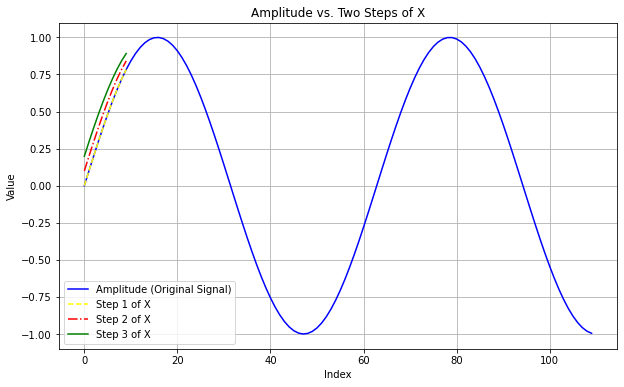

In [3]:
plt.figure(figsize=(10, 6))
plt.plot(amplitude, label="Amplitude (Original Signal)", color='blue')
plt.plot(X[0], label="Step 1 of X", color='yellow', linestyle='--')
plt.plot(X[1], label="Step 2 of X", color='red', linestyle='-.')
plt.plot(X[2], label="Step 3 of X", color='green', linestyle='-')
plt.xlabel("Index")
plt.ylabel("Value")
plt.title("Amplitude vs. Two Steps of X")
plt.legend()
plt.grid(True)
plt.show()

###  A simple LSTM model for next time step (t+1) prediction

<div>
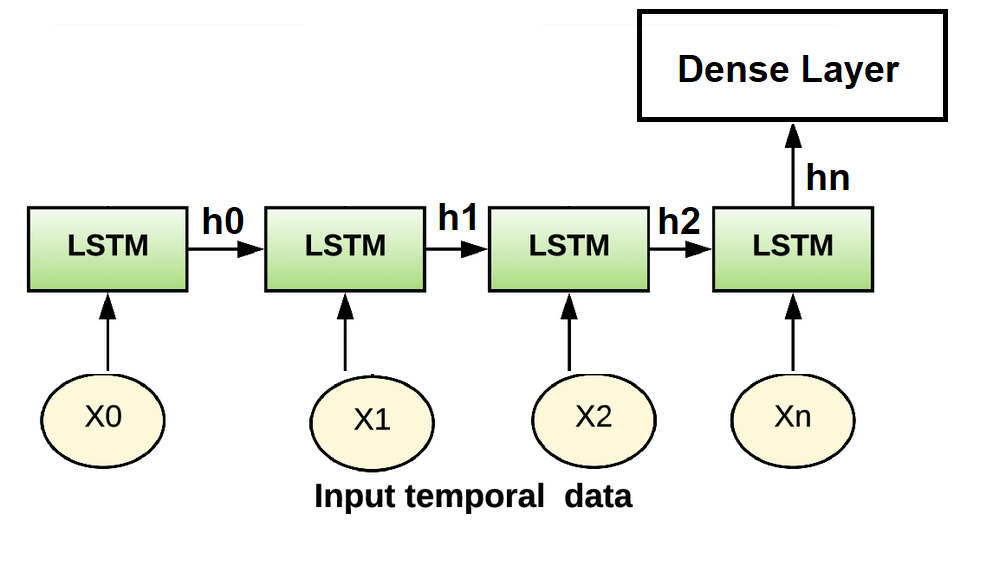
</div>
 

This code demonstrates how to create and train a basic LSTM model for next time step (t+1) prediction, where the LSTM layer learns from the input sequences and predicts the next value (t+1) based on the historical data.


1. Each time step in the sequence generates hidden states based on the input data and the learned patterns in time. These hidden states capture the temporal dependencies and encode the information from past time steps.

2. The LSTM layer processes the input sequence step by step, updating its internal state and outputting hidden states at each time step.

3. The final hidden state of the LSTM layer, which represents the learned patterns in the entire sequence, is passed to the Dense layer (fully connected layer) for making predictions.

4. The Dense layer takes the final LSTM hidden state as input and produces the predicted output value.

5. During training, the model is optimized to minimize the Mean Squared Error (MSE) between the predicted values and the corresponding target values in the Y array. This error calculation helps the model adjust its parameters (weights and biases) through backpropagation, improving its ability to predict the next value in the sequence.

So, the LSTM layer's ability to capture temporal patterns and the training process with MSE loss contribute to the model's learning and predictive capabilities for sequential data.

In [4]:
# Define the LSTM model
model_1 = Sequential([
    LSTM(10, input_shape=(num_samples, 1)),  # (1,10) for each sequence it returns the hidden state of the last time step
    Dense(1)  # Dense layer for output
])

model_1.compile(optimizer='adam', loss='mse')  # Compile the model
model_1.summary()

# Train the model
model_1.fit(X, Y, epochs=100, batch_size=16, verbose=0)

# Generate predictions
predictions_1 = model_1.predict(X)

print("Shape of prediction:", predictions_1.shape)  # (100, 1)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 10)                480       
                                                                 
 dense (Dense)               (None, 1)                 11        
                                                                 
Total params: 491
Trainable params: 491
Non-trainable params: 0
_________________________________________________________________
4/4 [==============================] - 0s 3ms/step
Shape of prediction: (100, 1)


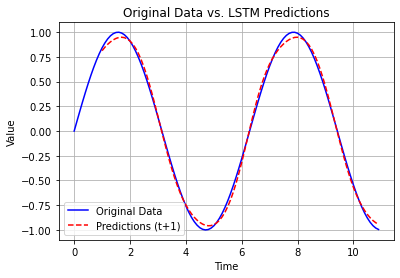

In [5]:
# Plot the original data and predictions
plt.plot(time, amplitude, label="Original Data", color='blue')
plt.plot(time[num_samples:], predictions_1, label="Predictions (t+1)", color='red', linestyle='--')
plt.xlabel("Time")
plt.ylabel("Value")
plt.title("Original Data vs. LSTM Predictions")
plt.legend()
plt.grid(True)
plt.show()

### A simple LSTM model based on the entire sequence for next time step (t+1) prediction

<div>
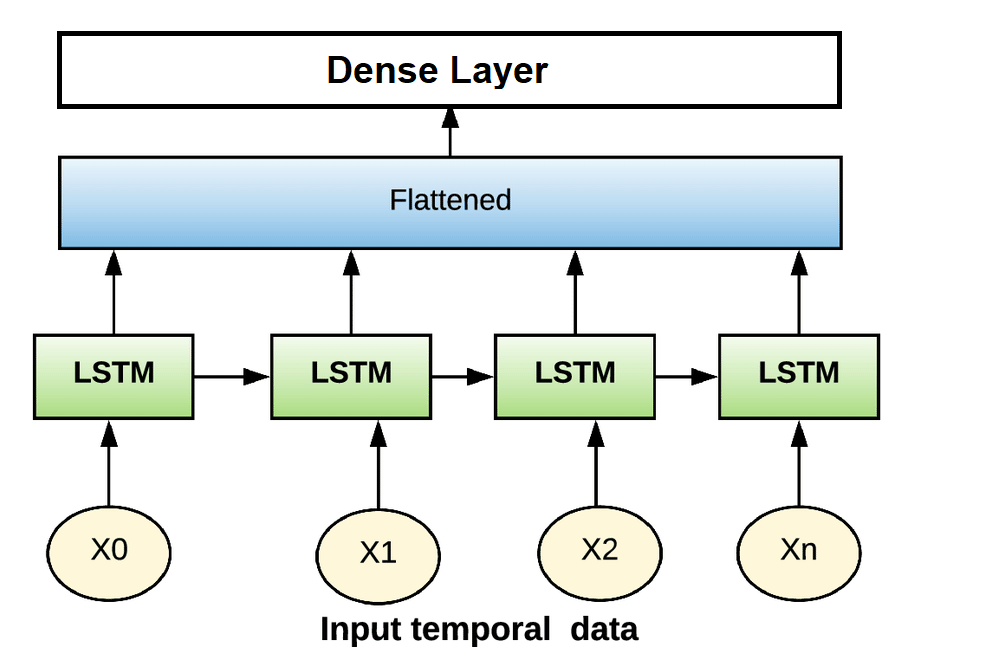
</div>


In the second LSTM model (model with return_sequences=True), the LSTM layer returns the hidden state for each time step, and then the Flatten layer reshapes this output before passing it to the Dense layer for prediction. This architecture is suitable for tasks where we need to capture and process information across the entire sequence.

Using return_sequences=True in an LSTM layer allows us to access the hidden states at each time step in the sequence rather than just the final hidden state. Here are some advantages of using return_sequences=True:

    1) Sequence-to-Sequence Learning: When dealing with sequence data, such as time series or natural language processing tasks, it is often beneficial to model the entire sequence rather than just the final outcome. For example, in machine translation, each word in the input sequence corresponds to a hidden state in the LSTM, and return_sequences=True allows the model to generate a sequence of output states that correspond to each input time step.

    2) Feature Extraction: The hidden states captured by the LSTM at each time step can contain valuable information about the temporal dependencies and patterns in the data. By using return_sequences=True, you retain this temporal information throughout the model, which can be useful for subsequent layers or tasks.

    3) Multi-layer LSTM Networks: When stacking multiple LSTM layers, it is common to use return_sequences=True in intermediate layers to pass the sequence information to the next LSTM layer. This enables the model to learn hierarchical representations of the input data.

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.layers import Flatten

# Define the LSTM model with return_sequences=True
model_2 = Sequential([
    LSTM(10, input_shape=(num_samples, 1), return_sequences=True),  # For each sequence, it returns the hidden state of each time step
    Flatten(),
    Dense(1)  # Dense layer for output
])

model_2.compile(optimizer='adam', loss='mse')  # Compile the model
model_2.summary()

# Train the model
model_2.fit(X, Y, epochs=100, batch_size=16, verbose=0)

# Generate predictions (sequences)
predictions_2 = model_2.predict(X)

print("Shape of prediction:", predictions_2.shape)  # (100,1)


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 10, 10)            480       
                                                                 
 flatten (Flatten)           (None, 100)               0         
                                                                 
 dense_1 (Dense)             (None, 1)                 101       
                                                                 
Total params: 581
Trainable params: 581
Non-trainable params: 0
_________________________________________________________________
4/4 [==============================] - 0s 2ms/step
Shape of prediction: (100, 1)


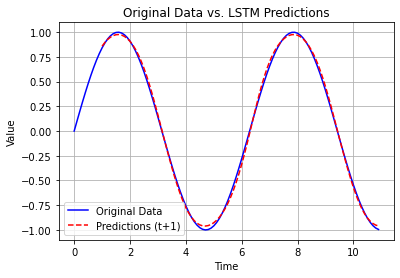

In [7]:
# Plot the original data and predictions
plt.plot(time, amplitude, label="Original Data", color='blue')
plt.plot(time[num_samples:], predictions_2, label="Predictions (t+1)", color='red', linestyle='--')
plt.xlabel("Time")
plt.ylabel("Value")
plt.title("Original Data vs. LSTM Predictions")
plt.legend()
plt.grid(True)
plt.show()

### Multi-layer LSTM model for next time step (t+1) prediction
<div>
<img src=https://www.researchgate.net/publication/340069908/figure/fig2/AS:871503180599303@1584793958518/Framework-and-process-diagram-of-multilayer-LSTM-model.jpg width="500"/>
<div>

This updated model consists of two LSTM layers followed by a Dense layer for predicting t+1 values.
    
1. First LSTM Layer (return_sequences=True):
   - Input shape: (100, 10, 1) representing sequences of 10 time steps.
   - Processes the input sequences and preserves the sequence dimensionality by returning sequences (`return_sequences=True`).
   
2. Second LSTM Layer (return_sequences=False):
   - Takes the output from the first LSTM layer, which is a sequence, and processes it further.
   - Does not return sequences (`return_sequences=False`), meaning it outputs a single hidden state for the last time step.
   
3. Dense Layer:
   - Accepts the output from the second LSTM layer (a single hidden state) and generates predictions for t+1 values using a Dense layer with 1 neuron.
   


In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.layers import Flatten

# Define the multi-layer LSTM model with return_sequences=True
model_3 = Sequential([
    LSTM(10, input_shape=(num_samples, 1), return_sequences=True),  # First LSTM layer with return_sequences=True
    LSTM(10, return_sequences=False),  # Second LSTM layer without return_sequences
    #Flatten(),
    Dense(1)  # Dense layer for output
])

model_3.compile(optimizer='adam', loss='mse')  # Compile the model
model_3.summary()

# Train the model
model_3.fit(X, Y, epochs=100, batch_size=16, verbose=0)

# Generate predictions (sequences)
predictions_3 = model_3.predict(X)

print("Shape of prediction:", predictions_3.shape)  # (100,1)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 10, 10)            480       
                                                                 
 lstm_3 (LSTM)               (None, 10)                840       
                                                                 
 dense_2 (Dense)             (None, 1)                 11        
                                                                 
Total params: 1,331
Trainable params: 1,331
Non-trainable params: 0
_________________________________________________________________
4/4 [==============================] - 1s 6ms/step
Shape of prediction: (100, 1)


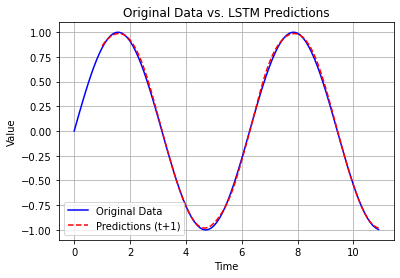

In [9]:
# Plot the original data and predictions
plt.plot(time, amplitude, label="Original Data", color='blue')
plt.plot(time[num_samples:], predictions_3, label="Predictions (t+1)", color='red', linestyle='--')
plt.xlabel("Time")
plt.ylabel("Value")
plt.title("Original Data vs. LSTM Predictions")
plt.legend()
plt.grid(True)
plt.show()

### Sequence Reconstruction with Simplified LSTM

The model is designed to reconstruct input sequences of shape (100, 10, 1) using a single output value (output shape (100,1)), aiming to capture and replicate the essential information from the input sequences.

This model learns to reconstruct the original input sequences using an LSTM and a Dense layer, without using TimeDistributed. 

In this model, we predict one value for each sequence that describes the behaviour of the sequence. To acheive this the loss function calculates the Mean Squared Error (MSE). For instance, for one sequence ($X_i$) in the context of our model, the loss can be explained as follows:

Suppose we have one sequence ($ X_i = [x_{i,1}, x_{i,2}, x_{i,3}, x_{i,4}, x_{i,5}, x_{i,6}, x_{i,7}, x_{i,8}, x_{i,9}, x_{i,10}] $) where each ($ x_{i,j}$) is a value.

Let's say the model predicts a single value ($\hat{y}_i$) for this sequence.

To calculate the Mean Squared Error (MSE) for this sequence, we follow these steps:

   1. Compute the squared difference between each element in the sequence ($X_i$) and the predicted value ($\hat{y}_i$).

 $\text{Squared Differences} = [(x_{i,1} - \hat{y}_i)^2, (x_{i,2} - \hat{y}_i)^2, \ldots, (x_{i,10} - \hat{y}_i)^2]$

   2. Calculate the mean of these squared differences to get the MSE.

$\text{MSE} = \frac{1}{10} \sum_{j=1}^{10} (x_{i,j} - \hat{y}_i)^2$

Let's demonstrate this with some example values:

Suppose our sequence ($X_i$) is:
$X_i = [2, 4, 6, 8, 10, 12, 14, 16, 18, 20]$
and the predicted value $\hat{y}_i = 12.5$.

Then, the squared differences are:

$\text{Squared Differences} = [(2 - 12.5)^2, (4 - 12.5)^2, \ldots, (20 - 12.5)^2]$
$= [121.25, 72.25, 25.25, 2.25, 6.25, 1.25, 2.25, 12.25, 36.25, 56.25]$

The MSE is calculated as:

$\text{MSE} = \frac{1}{10} \sum_{j=1}^{10} (x_{i,j} - \hat{y}_i)^2 = \frac{1}{10} \times (121.25 + 72.25 + \ldots + 56.25)$

$\text{MSE} = \frac{1}{10} \times 375.5 = 37.55$

This is how the MSE is computed for a single sequence ($X_i$) in the context of your model's training process.

In [10]:
# Model without TimeDistributed
from keras.utils import plot_model
model_without_TD = Sequential([
    LSTM(5, input_shape=(num_samples, 1)),  # LSTM layer without return_sequences=True
    Dense(1)  # Dense layer for output
])

# Compile models
model_without_TD.compile(optimizer='adam', loss='mse')

model_without_TD.summary()

# Train models
model_without_TD.fit(X, X, epochs=300, batch_size=16, verbose=0)

# Generate predictions
pred_without_TD = model_without_TD.predict(X)

# Compare predictions
print("Shape of prediction without TimeDistributed:", pred_without_TD.shape)  # (100, 1)


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 5)                 140       
                                                                 
 dense_3 (Dense)             (None, 1)                 6         
                                                                 
Total params: 146
Trainable params: 146
Non-trainable params: 0
_________________________________________________________________
4/4 [==============================] - 0s 2ms/step
Shape of prediction without TimeDistributed: (100, 1)


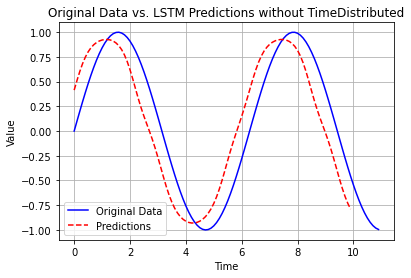

In [11]:
# Plot the original data and predictions
plt.plot(time, amplitude, label="Original Data", color='blue')
plt.plot(time[0:100], pred_without_TD, label="Predictions", color='red', linestyle='--')
plt.xlabel("Time")
plt.ylabel("Value")
plt.title("Original Data vs. LSTM Predictions without TimeDistributed")
plt.legend()
plt.grid(True)
plt.show()

### Sequence Reconstruction with LSTM TimeDistributed Layer

<div>
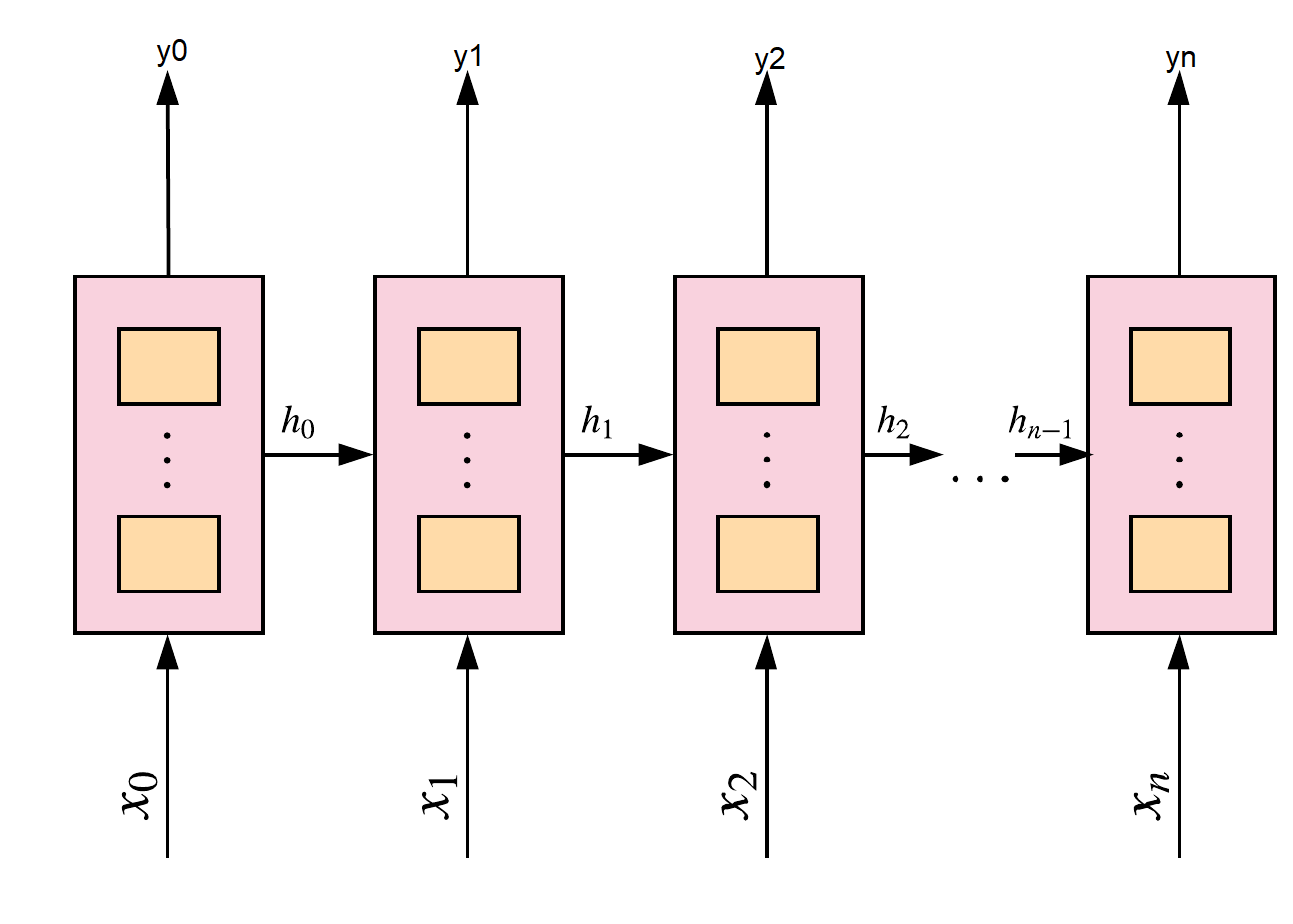
</div>

The model with TimeDistributed overcomes the challenge of generating a single output for each sequence in an LSTM autoencoder. By using TimeDistributed with a Dense layer, we ensure that each time step's hidden layer information is individually processed to predict the output, resulting in an output shape (100, 10, 1) that matches the input sequence shape (100, 10, 1). This approach enables us to reconstruct the sequence accurately by leveraging the hidden state information from each time step.


In the model with TimeDistributed, the input to each time step of the LSTM includes two main components:

    1. Current Input Value: This refers to the actual input value at the current time step in the sequence (e.g., from the input sequence X).

    2. Hidden State of Previous Time Step: The hidden state from the previous time step in the sequence serves as the internal memory or context for the LSTM. It captures information learned from earlier time steps and influences the prediction at the current time step.

Together, these components provide the necessary information for the LSTM to process the sequence data effectively and make predictions at each time step.

In [5]:
# Model with TimeDistributed
model_with_TD = Sequential([
    LSTM(5, input_shape=(num_samples, 1), return_sequences=True),  # LSTM layer with return_sequences=True
    TimeDistributed(Dense(1))  # TimeDistributed layer wrapping Dense for each time step
])

# Compile models
model_with_TD.compile(optimizer='adam', loss='mse')


model_with_TD.summary()


# Train models
model_with_TD.fit(X, X, epochs=400, batch_size=16, verbose=0)

# Generate predictions
pred_with_TD = model_with_TD.predict(X)

# Compare predictions
print("Shape of prediction with TimeDistributed:", pred_with_TD.shape)  # (100, 10, 1)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 10, 5)             140       
                                                                 
 time_distributed (TimeDistr  (None, 10, 1)            6         
 ibuted)                                                         
                                                                 
Total params: 146
Trainable params: 146
Non-trainable params: 0
_________________________________________________________________
4/4 [==============================] - 0s 3ms/step
Shape of prediction with TimeDistributed: (100, 10, 1)


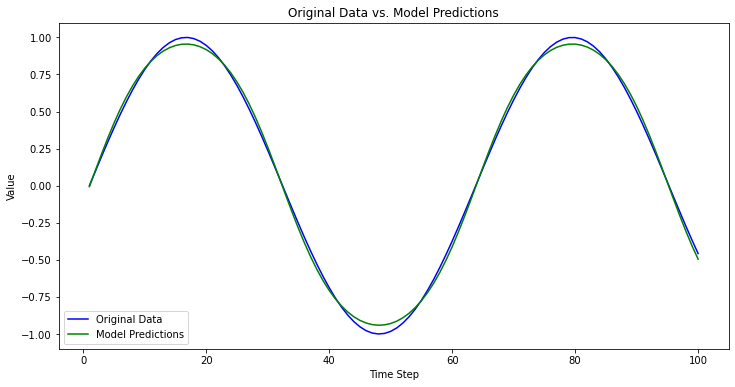

In [6]:
import matplotlib.pyplot as plt

# Plotting the original data and model predictions
def plot_results(original_data, predicted_data):
    plt.figure(figsize=(12, 6))
    plt.title("Original Data vs. Model Predictions")
    plt.xlabel("Time Step")
    plt.ylabel("Value")

    # Plot original data
    plt.plot(range(1, len(original_data) + 1), original_data, label="Original Data", color='blue')

    # Plot model predictions
    plt.plot(range(1, len(predicted_data) + 1), predicted_data, label="Model Predictions", color='green')

    plt.legend()
    plt.show()

# Extract a sample of original data and its corresponding prediction
sample_idx = 0  # Choose a sample index
original_sample = X[0:, 0, 0]
predicted_sample = pred_with_TD[0:,0, 0].flatten()  # Flatten the predicted sequence

# Plot the results
plot_results(original_sample, predicted_sample)